R,amplitude
0, 0.500000
1, 0.866025


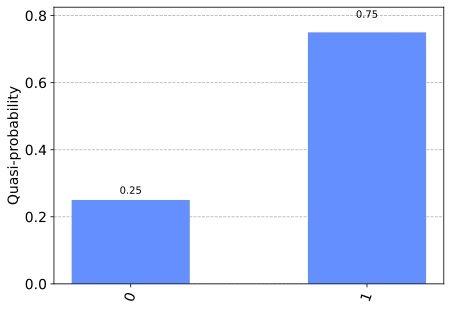

In [2]:
import numpy as np
import math
from qiskit import QuantumCircuit, QuantumRegister

from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

import crsq.amplitudes as amplitudes
import crsq.setdistribution as sdist
import crsq.statevector as svec

qr = QuantumRegister(1, "R")
qc = QuantumCircuit(qr)
cn = np.array([np.sqrt(1/4), np.sqrt(3/4)])
sdist.setdist(qc, qr, cn)
qc.save_statevector()

backend = AerSimulator(method='automatic')

transpiled = transpile(qc, backend)

result = backend.run(transpiled, shots=100*len(cn)).result()
sv = result.get_statevector()
counts = result.get_counts()

#sv.draw('latex')

svec.dump_statevector(sv, qc)

# transpiled.draw()

# qc.draw()

plot_histogram(counts)


 R,amplitude
00, 0.316228
01, 0.447214*exp(1.570796j)
10, 0.547723*exp(3.141593j)
11, 0.632456*exp(-1.570796j)


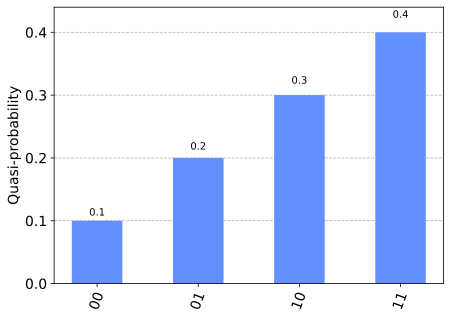

In [3]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
import crsq.setdistribution as sdist

from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import crsq.amplitudes as amplitudes
import crsq.statevector as svec

qr = QuantumRegister(2, "R")
qc = QuantumCircuit(qr)
cn = np.array([np.sqrt(1/10), np.sqrt(2/10)*1j, -np.sqrt(3/10), np.sqrt(4/10)*-1j])
sdist.setdist(qc, qr, cn)
qc.save_statevector()

backend = AerSimulator(method='automatic')
transpiled = transpile(qc, backend)
result = backend.run(transpiled, shots=100*len(cn)).result()
#sv.draw('latex')
counts = result.get_counts()
sv = result.get_statevector()

svec.dump_statevector(sv, qc)
# qc.draw()
# transpiled.draw()

plot_histogram(counts)

  R,amplitude
000, 0.166667
001, 0.235702
010, 0.288675
011, 0.333333
100, 0.372678
101, 0.408248
110, 0.440959
111, 0.471405


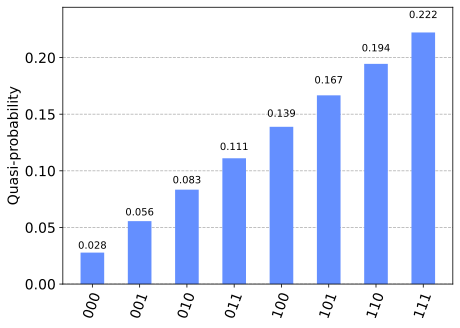

In [4]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
import crsq.setdistribution as sdist

from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import crsq.amplitudes as amplitudes
import crsq.statevector as svec

qr = QuantumRegister(3, "R")
qc = QuantumCircuit(qr)
pn = [1,2,3,4,5,6,7,8] # unnormalized probabilities
an = [np.sqrt(p) for p in pn]
cn = np.array(an)
sdist.setdist(qc, qr, cn)
qc.save_statevector()

backend = AerSimulator(method='automatic')

transpiled = transpile(qc, backend)
result = backend.run(transpiled, shots=100*len(cn)).result()
sv = result.get_statevector()
counts = result.get_counts()

svec.dump_statevector(sv, qc)

plot_histogram(counts)



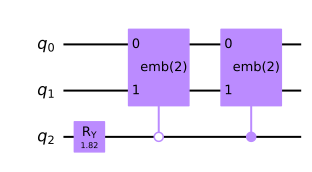

In [5]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
import crsq.setdistribution as sdist

qr = QuantumRegister(3, "q")
qc = QuantumCircuit(qr)
pn = [1,2,3,4,5,6,7,8] # unnormalized probabilities
an = [np.sqrt(p) for p in pn]
cn = np.array(an)
setv_gate = sdist.SetdGate(3, pn, an)
for inst in setv_gate.definition:
    qc.append(inst.operation, inst.qubits)
#sdist.setv(qc, qr, cn)
qc.draw()


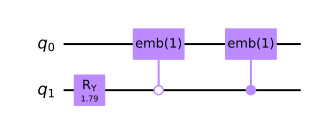

In [6]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
import crsq.setdistribution as sdist

qr = QuantumRegister(2, "q")
qc = QuantumCircuit(qr)
pn = [1,2,3,4] # unnormalized probabilities
an = [np.sqrt(p) for p in pn]
cn = np.array(an)
setv_gate = sdist.SetdGate(2, pn, an)
for inst in setv_gate.definition:
    qc.append(inst.operation, inst.qubits)

qc.draw()


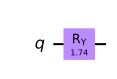

In [7]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
import crsq.setdistribution as sdist

qr = QuantumRegister(1, "q")
qc = QuantumCircuit(qr)
pn = [1,2] # unnormalized probabilities
an = [np.sqrt(p) for p in pn]
cn = np.array(an)
setv_gate = sdist.SetdGate(1, pn, an)
for inst in setv_gate.definition:
    qc.append(inst.operation, inst.qubits)
#sdist.setv(qc, qr, cn)
qc.draw()


00000 : z=0.133850-0.000000j |z|=0.133850 p=0.017916
00001 : z=0.000000+0.151672j |z|=0.151672 p=0.023004
00010 : z=-0.171867+0.000000j |z|=0.171867 p=0.029538
00011 : z=-0.000000-0.194751j |z|=0.194751 p=0.037928
00100 : z=0.220682-0.000000j |z|=0.220682 p=0.048700
00101 : z=0.000000+0.250065j |z|=0.250065 p=0.062533
00110 : z=-0.283361+0.000000j |z|=0.283361 p=0.080293
00111 : z=-0.000000-0.321090j |z|=0.321090 p=0.103099
01000 : z=0.363843-0.000000j |z|=0.363843 p=0.132381
01001 : z=0.000000+0.321090j |z|=0.321090 p=0.103099
01010 : z=-0.283361+0.000000j |z|=0.283361 p=0.080293
01011 : z=-0.000000-0.250065j |z|=0.250065 p=0.062533
01100 : z=0.220682-0.000000j |z|=0.220682 p=0.048700
01101 : z=0.000000+0.194751j |z|=0.194751 p=0.037928
01110 : z=-0.171867+0.000000j |z|=0.171867 p=0.029538
01111 : z=-0.000000-0.151672j |z|=0.151672 p=0.023004
10000 : z=0.133850-0.000000j |z|=0.133850 p=0.017916
10001 : z=0.000000+0.118122j |z|=0.118122 p=0.013953
10010 : z=-0.104243+0.000000j |z|=0.10

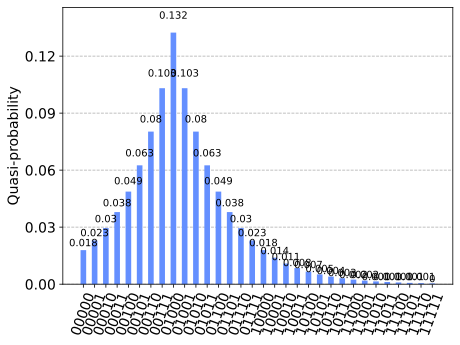

In [2]:
import numpy as np
import cmath
from qiskit import QuantumCircuit, QuantumRegister
import crsq.setdistribution as sdist
from tests.test_tools import run_circuit_and_check

from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import crsq.amplitudes as amplitudes

qr = QuantumRegister(5, "R")
qc = QuantumCircuit(qr)
cn = np.array([cmath.exp(-(np.abs(n-8)/8)+0.5j*np.pi*n) for n in range(32)])
sdist.setdist(qc, qr, cn)
qc.save_statevector()

backend = AerSimulator(method='automatic')
transpiled = transpile(qc, backend)
result = backend.run(transpiled, shots=100*len(cn)).result()
sv = result.get_statevector()
counts = result.get_counts()

eps=1.0e-8
for k, z in sorted(sv.to_dict().items()):
    r = abs(z)
    if r > eps:
        print(f"{k} : z={z:.6f} |z|={r:.6f} p={r*r:.6f}")
plot_histogram(counts)


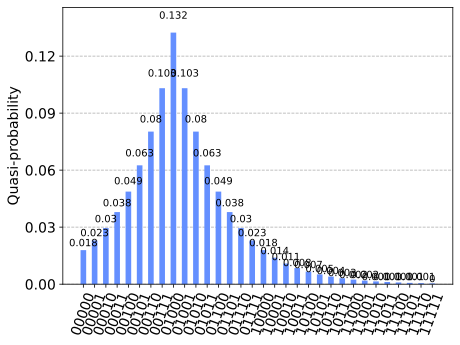

In [3]:
from crsq.blocks.embed import StateEmbedGate

emb = StateEmbedGate(cn)
qc = emb.circuit
qc.save_statevector()

backend = AerSimulator(method='automatic')
transpiled = transpile(qc, backend)
result = backend.run(transpiled, shots=100*len(cn)).result()
sv = result.get_statevector()
counts = result.get_counts()

# eps=1.0e-8
# for k, z in sorted(sv.to_dict().items()):
#     r = abs(z)
#     if r > eps:
#         print(f"{k} : z={z:.6f} |z|={r:.6f} p={r*r:.6f}")
plot_histogram(counts)

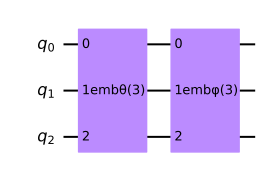

In [10]:
import crsq.blocks.embed as embed

data = [1,2,3,4,5,6,7,8]
emb = embed.StateEmbedGate(data)
emb.circuit.draw()

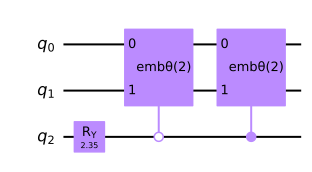

In [11]:
import crsq.blocks.embed as embed

data = [1,2,3,4,5,6,7,8]
sq = [t*t for t in data]
k=8
amp = embed.AmplitudeEmbedGate(data[:k], sq[:k])
amp.circuit.draw()

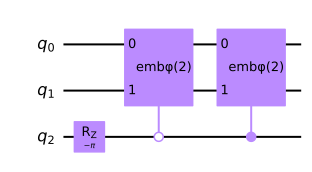

In [5]:
import crsq.blocks.embed as embed
import math
import cmath
data0 = [1j,2j,3j,4j,-5j,-6j,-7j,-8j]
n=3
k=2**n
data=data0[:k]
amp = embed.PhaseEmbedGate(data)
amp.circuit.draw()

In [8]:
from qiskit_aer import AerSimulator
from qiskit import transpile
import math
import cmath
data = [cmath.exp(1j*math.pi*(k)/16) for k in range(16)]
phz = embed.StateEmbedGate(data)
phz.circuit.save_statevector()
phz.circuit.draw()
be = AerSimulator()
tcirc = transpile(phz.circuit, be)
result = be.run(tcirc).result()
sv = result.get_statevector()
for i, z in enumerate(sv.data):
    print(i, abs(z), cmath.phase(z)/(2*math.pi)*16)



0 0.24999999999999958 -3.7500000000000013
1 0.24999999999999986 -3.2500000000000044
2 0.24999999999999944 -2.7500000000000027
3 0.24999999999999942 -2.250000000000001
4 0.25000000000000006 -1.750000000000001
5 0.24999999999999994 -1.2500000000000038
6 0.24999999999999967 -0.7500000000000032
7 0.2499999999999997 -0.25000000000000344
8 0.24999999999999975 0.24999999999999856
9 0.2499999999999999 0.7499999999999968
10 0.24999999999999956 1.2499999999999987
11 0.2499999999999995 1.7499999999999987
12 0.25 2.249999999999998
13 0.25 2.749999999999995
14 0.24999999999999967 3.249999999999997
15 0.24999999999999956 3.7499999999999956
